In [1]:
import sys  
sys.path.insert(0, '/home/irisib/Bureau/nn-synth-interp/logs')
sys.path.insert(0, '/home/irisib/Bureau/nn-synth-interp/utils')
sys.path.insert(0, '/home/irisib/Bureau/nn-synth-interp/data')
sys.path.insert(0, '/home/irisib/Bureau/nn-synth-interp/synth')
from utils import *
import os
import importlib
import numpy as np
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 120
#%matplotlib widget  # don't use widgets for figures to be commited
from IPython.display import Audio
import librosa
import soundfile

import divadataset
import diva
import lib
import utils.figures
import socket
import time
from datetime import datetime 
from multiprocessing import Process
import multiprocessing

diva_db = diva.PresetDatabase()
diva_synth = diva.Diva()

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

importlib.reload(diva)
importlib.reload(divadataset)
diva_dataset = divadataset.DivaDataset(note_duration = 3.0, n_fft = 512, fft_hop = 512,
                               midi_note=60, midi_velocity=100, n_mel_bins=-1,
                               normalize_audio=False, spectrogram_min_dB=-120.0,
                               spectrogram_normalization ='min_max')
diva_db = diva.PresetDatabase()
diva_synth = diva.Diva()

In [2]:
param_names = diva.PresetDatabase.get_param_names(diva_db)
print("==============PARAM NAMES==============")
print(diva_synth.engine.get_plugin_parameters_description())

==============PARAM NAMES==============
  0: main: Output
  1: main: Active #FX1
  2: main: Active #FX2
  3: PCore: LED Colour
  4: VCC: Voices
  5: VCC: Voice Stack
  6: VCC: Mode
  7: VCC: GlideMode
  8: VCC: Glide
  9: VCC: Glide2
 10: VCC: GlideRange
 11: VCC: PitchBend Up
 12: VCC: PitchBend Down
 13: VCC: TuningMode
 14: VCC: Transpose
 15: VCC: FineTuneCents
 16: VCC: Note Priority
 17: VCC: MultiCore
 18: OPT: Accuracy
 19: OPT: OfflineAcc
 20: OPT: TuneSlop
 21: OPT: CutoffSlop
 22: OPT: GlideSlop
 23: OPT: PWSlop
 24: OPT: EnvrateSlop
 25: OPT: V1Mod
 26: OPT: V2Mod
 27: OPT: V3Mod
 28: OPT: V4Mod
 29: OPT: V5Mod
 30: OPT: V6Mod
 31: OPT: V7Mod
 32: OPT: V8Mod
 33: ENV1: Attack
 34: ENV1: Decay
 35: ENV1: Sustain
 36: ENV1: Release
 37: ENV1: Velocity
 38: ENV1: Model
 39: ENV1: Trigger
 40: ENV1: Quantise
 41: ENV1: Curve
 42: ENV1: Release On
 43: ENV1: KeyFollow
 44: ENV2: Attack
 45: ENV2: Decay
 46: ENV2: Sustain
 47: ENV2: Release
 48: ENV2: Velocity
 49: ENV2: Model
 5

In [3]:
print("Machine: '{}' ({} CPUs)".format(socket.gethostname(), os.cpu_count()))

t0 = time.time()
diva_db = diva.PresetDatabase()
diva_synth = diva.Diva()
diva_db.get_size_info()
print("{} (loaded in {:.1f}s)".format(diva_db, time.time() - t0))
names = diva_db.get_param_names()


Machine: 'jupyter-server' (4 CPUs)
All params memory usage  : 0.00251007080078125 MB
All presets memory usage : 0.08592987060546875 MB
11217 Diva presets in database '/home/irisib/Bureau/nn-synth-interp/synth/diva_presets.pkl'. (loaded in 0.6s)


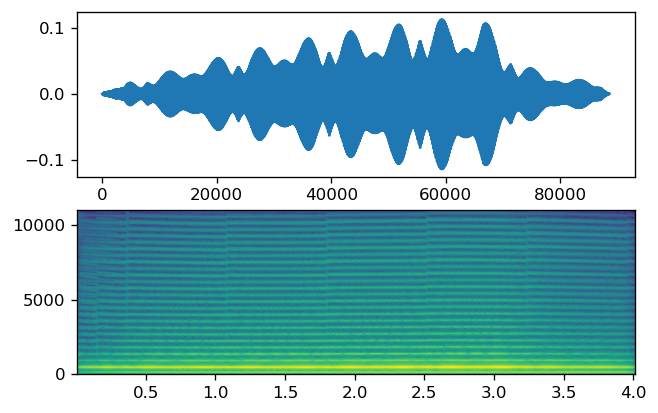

In [4]:

patchTest = diva_db.get_preset_values(555)
diva_synth.assign_preset(patchTest)
audio = diva_synth.render_note(57, 100)

plt.figure(1)
plt.subplot(211)
plt.plot(audio)
plt.subplot(212)
plt.specgram(audio, NFFT=diva_synth.fft_size, Fs=diva_synth.Fs, noverlap=256)
plt.show()

In [2]:
%%time
diva_dataset = divadataset.DivaDataset(note_duration = 3.0, n_fft = 512, fft_hop = 512,
                               midi_note=60, midi_velocity=100, n_mel_bins=-1,
                               normalize_audio=False, spectrogram_min_dB=-120.0,
                               spectrogram_normalization ='min_max')

diva_dataset.generate_wav_files()

Writing .wav files... (0/11217)
Writing .wav files... (50/11217)
Writing .wav files... (100/11217)
Writing .wav files... (150/11217)
Writing .wav files... (200/11217)
Writing .wav files... (250/11217)
Writing .wav files... (300/11217)
Writing .wav files... (350/11217)
Writing .wav files... (400/11217)
Writing .wav files... (450/11217)
Writing .wav files... (500/11217)
Writing .wav files... (550/11217)
Writing .wav files... (600/11217)
Writing .wav files... (650/11217)
Writing .wav files... (700/11217)
Writing .wav files... (750/11217)
Writing .wav files... (800/11217)
Writing .wav files... (850/11217)
Writing .wav files... (900/11217)
Writing .wav files... (950/11217)
Writing .wav files... (1000/11217)
Writing .wav files... (1050/11217)
Writing .wav files... (1100/11217)
Writing .wav files... (1150/11217)
Writing .wav files... (1200/11217)
Writing .wav files... (1250/11217)
Writing .wav files... (1300/11217)
Writing .wav files... (1350/11217)
Writing .wav files... (1400/11217)
Writing 

KeyboardInterrupt: 

In [173]:
%%time
diva_dataset.compute_and_store_spectrograms_stats()

Processed stats of 0/11217 spectrograms
Processed stats of 5000/11217 spectrograms
Processed stats of 10000/11217 spectrograms
Results written to DivaDataset_spectrogram_nfft0512hop0512melsNone _full.csv and .json files
CPU times: user 1min 10s, sys: 2.87 s, total: 1min 13s
Wall time: 20.6 s


# Test des cardinalités

280 free params, 1 params should be locked
CPU times: user 1min 30s, sys: 364 ms, total: 1min 30s
Wall time: 1min 30s


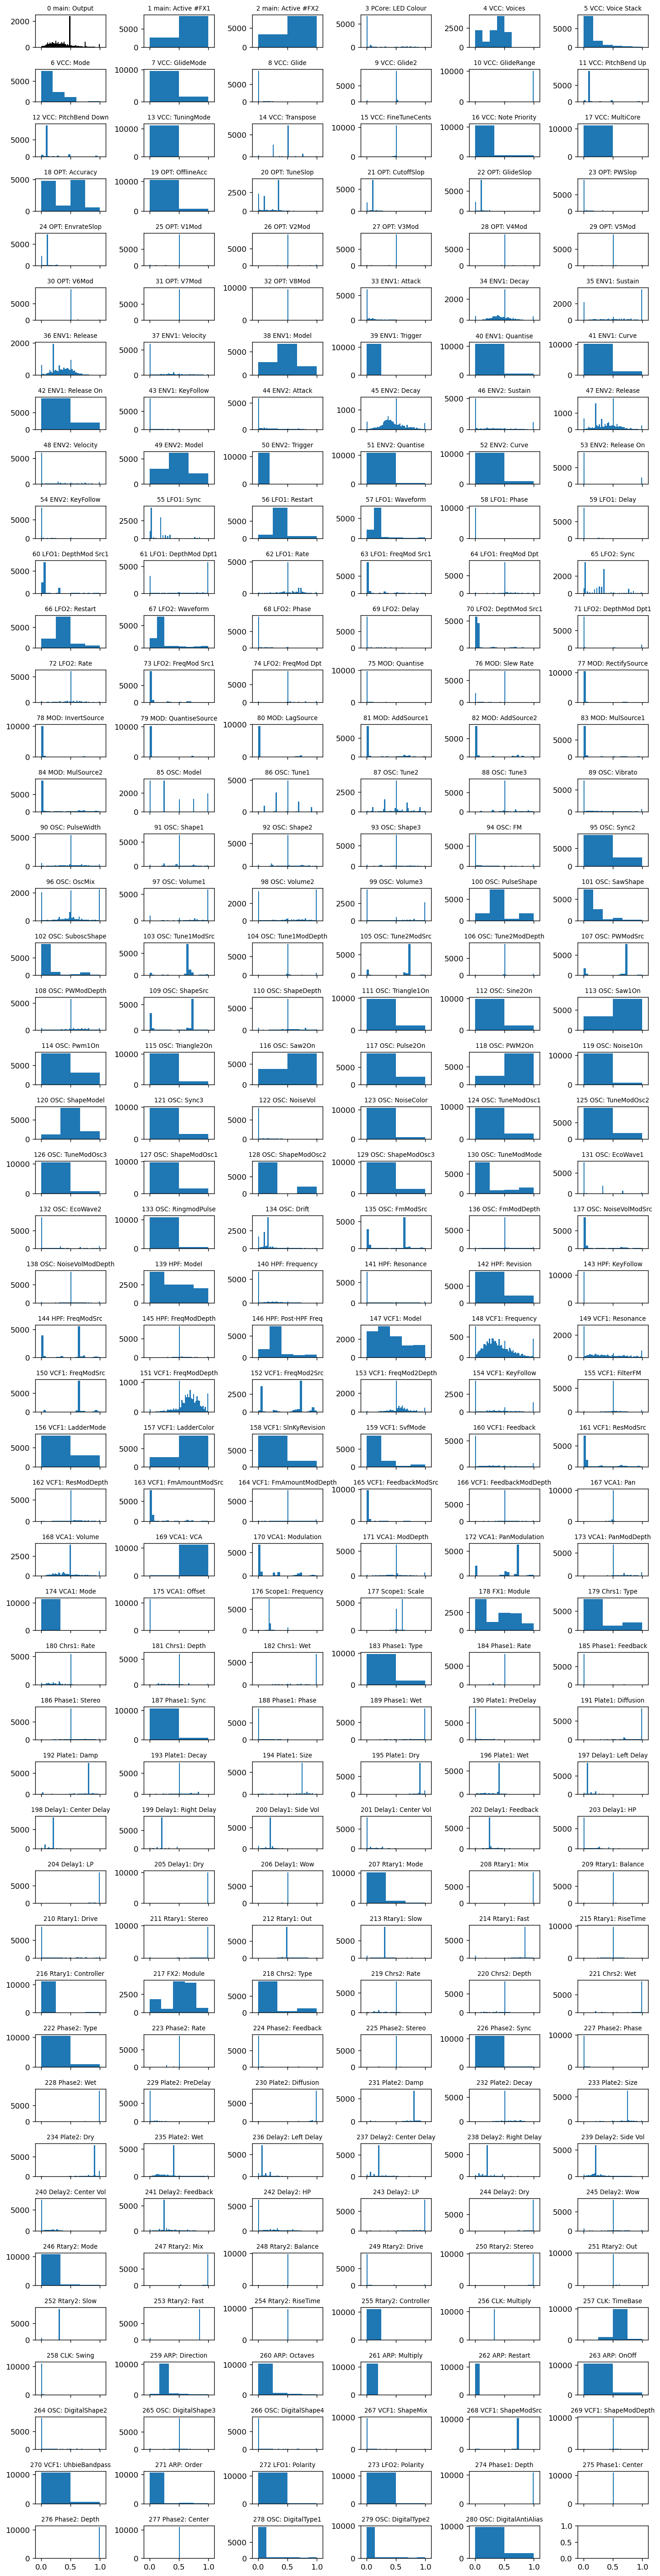

In [12]:
%%time
params_to_lock = [0]
current_preset = []

# Histogrammes de *tous* les paramètres, pour voir ceux qu'on peut éventuellement virer
param_names = diva_db.get_param_names()
presets = diva_db.all_presets
print("{} free params, {} params should be locked".format(len(diva_db.param_names) - len(params_to_lock), len(params_to_lock)))
n_cols = 6
n_rows = 1 + len(param_names) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 1.0), sharex=True)
for i in range(len(param_names)):
    for index in range(0, diva_db.get_nb_presets()):
        current_preset.append(diva_db.get_preset_values(index, plugin_format = False)[i])
    col = i % n_cols
    row = i // n_cols
    # Custom bins for discrete params
    param_cardinality = diva_synth.get_param_cardinality(i)
    if param_cardinality > 0:
        bins = [float(i) / param_cardinality for i in range(param_cardinality+1)]
    else:
        bins = 50
    if i in params_to_lock:
        color = 'k'
    else:
        color = 'C0'
    axes[row, col].hist(current_preset, bins=bins, fc=color)
    current_preset.clear()
    axes[row, col].set_xlim([-0.1, 1.1])
    axes[row, col].set_title("{} {}".format(i, param_names[i]), fontsize=8)
fig.tight_layout()

In [175]:
from iteration_utilities import duplicates
from iteration_utilities import unique_everseen
from termcolor import colored

def listDupsUnique(listNums):
	return list(unique_everseen(duplicates(listNums)))

params_to_lock    = [0]

current_preset    = []
possibles_values  = []
dupli_list        = []
warning_parameter = []
null_parameter    = []

warning_count     = 0
Verified          = True


param_names = diva_db.get_param_names()
presets = diva_db.all_presets
print("{} free params, {} params should be locked".format(len(diva_db.param_names) - len(params_to_lock), len(params_to_lock)))


for i in range(len(param_names)):
    for index in range(0, diva_db.get_nb_presets()):
        current_preset.append(diva_db.get_preset_values(index, plugin_format = False)[i])
    
    param_cardinality = diva_synth.get_param_cardinality(i)
    if param_cardinality > 0:
        
        for cardinality in range(0, param_cardinality):
            possibles_values.append(round((1/(param_cardinality-1) * cardinality),3))
        
        for element in listDupsUnique(current_preset):
            value = round(element, 3)
            dupli_list.append(value)
            if (value not in possibles_values):
                Verified = False
              
        print(color.BOLD + "\n\nPARAMETRE n°" + str(i) + " : " + param_names[i] + str(param_cardinality))
        
        if param_cardinality != len(dupli_list):
            print(colored("Cardinals utilisés : " + str(len(dupli_list)) + "/" + str(param_cardinality), 'red'))
        else:
            print(colored("Cardinals utilisés : " + str(len(dupli_list)) + "/" + str(param_cardinality), 'green')) 
        
        DL = sorted(dupli_list)
        print("\nValeurs obtenues  : " + str(DL))
        print("\nValeurs possibles : " + str(possibles_values))
        
        if len(dupli_list) == 1:
            null_parameter.append(i)
        
        if Verified == True:
            print(color.END + "\nLes valeurs sont correspondantes")
        else:
            print(color.RED + "\nLES VALEURS NE CORRESPONDENT PAS A LA CARDINNALITE" + color.END)
            warning_parameter.append(i)
            warning_count = warning_count + 1
        Verified = True
        possibles_values.clear()
        dupli_list.clear()
        
    current_preset.clear()
print(color.BOLD + "\n\n\nIl y a " + str(warning_count) + " Paramètres qui pose problème :")
print("---------------------------------------------------------------------------------")
print(warning_parameter)
print(color.BOLD + "\nIl y a " + str(len(null_parameter)) + " Paramètres présentant une valeur fixe :")
print("---------------------------------------------------------------------------------")
print(null_parameter)

280 free params, 1 params should be locked


PARAMETRE n°1 : main: Active #FX12
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°2 : main: Active #FX22
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°4 : VCC: Voices8
Cardinals utilisés : 5/8

Valeurs obtenues  : [0.0, 0.143, 0.286, 0.429, 0.571]

Valeurs possibles : [0.0, 0.143, 0.286, 0.429, 0.571, 0.714, 0.857, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°5 : VCC: Voice Stack6
Cardinals utilisés : 6/6

Valeurs obtenues  : [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

Valeurs possibles : [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°6 : VCC: Mode5
Cardinals utilisés : 5/5

Valeurs obtenues  : [0.0, 0.25, 0.5, 0.75, 1.0]

Valeurs possibles : [0.0, 0.25, 0.5, 0.75, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°7 : VCC: GlideMode2



PARAMETRE n°70 : LFO2: DepthMod Src124
Cardinals utilisés : 23/24

Valeurs obtenues  : [0.0, 0.043, 0.087, 0.13, 0.174, 0.217, 0.261, 0.304, 0.348, 0.391, 0.478, 0.522, 0.565, 0.609, 0.652, 0.696, 0.739, 0.783, 0.826, 0.87, 0.913, 0.957, 1.0]

Valeurs possibles : [0.0, 0.043, 0.087, 0.13, 0.174, 0.217, 0.261, 0.304, 0.348, 0.391, 0.435, 0.478, 0.522, 0.565, 0.609, 0.652, 0.696, 0.739, 0.783, 0.826, 0.87, 0.913, 0.957, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°73 : LFO2: FreqMod Src124
Cardinals utilisés : 24/24

Valeurs obtenues  : [0.0, 0.043, 0.087, 0.13, 0.174, 0.217, 0.261, 0.304, 0.348, 0.391, 0.435, 0.478, 0.522, 0.565, 0.609, 0.652, 0.696, 0.739, 0.783, 0.826, 0.87, 0.913, 0.957, 1.0]

Valeurs possibles : [0.0, 0.043, 0.087, 0.13, 0.174, 0.217, 0.261, 0.304, 0.348, 0.391, 0.435, 0.478, 0.522, 0.565, 0.609, 0.652, 0.696, 0.739, 0.783, 0.826, 0.87, 0.913, 0.957, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°77 : MOD: RectifySource24
Cardinals utilisés : 23/24





PARAMETRE n°114 : OSC: Pwm1On2
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°115 : OSC: Triangle2On2
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°116 : OSC: Saw2On2
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°117 : OSC: Pulse2On2
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°118 : OSC: PWM2On2
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°119 : OSC: Noise1On2
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°120 : OSC: ShapeModel3
Cardinals utilisés



PARAMETRE n°169 : VCA1: VCA2
Cardinals utilisés : 2/2

Valeurs obtenues  : [0.0, 1.0]

Valeurs possibles : [0.0, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°170 : VCA1: Modulation24
Cardinals utilisés : 23/24

Valeurs obtenues  : [0.0, 0.043, 0.087, 0.13, 0.174, 0.217, 0.261, 0.304, 0.348, 0.391, 0.435, 0.522, 0.565, 0.609, 0.652, 0.696, 0.739, 0.783, 0.826, 0.87, 0.913, 0.957, 1.0]

Valeurs possibles : [0.0, 0.043, 0.087, 0.13, 0.174, 0.217, 0.261, 0.304, 0.348, 0.391, 0.435, 0.478, 0.522, 0.565, 0.609, 0.652, 0.696, 0.739, 0.783, 0.826, 0.87, 0.913, 0.957, 1.0]

Les valeurs sont correspondantes


PARAMETRE n°172 : VCA1: PanModulation24
Cardinals utilisés : 22/24

Valeurs obtenues  : [0.0, 0.043, 0.087, 0.13, 0.174, 0.261, 0.348, 0.391, 0.435, 0.478, 0.522, 0.565, 0.609, 0.652, 0.696, 0.739, 0.783, 0.826, 0.87, 0.913, 0.957, 1.0]

Valeurs possibles : [0.0, 0.043, 0.087, 0.13, 0.174, 0.217, 0.261, 0.304, 0.348, 0.391, 0.435, 0.478, 0.522, 0.565, 0.609, 0.652, 0.696, 0.739, 0

In [176]:
from iteration_utilities import duplicates
from iteration_utilities import unique_everseen
from termcolor import colored

def listDupsUnique(listNums):
	return list(unique_everseen(duplicates(listNums)))

params_to_lock    = [0]

current_preset    = []
possibles_values  = []
dupli_list        = []
warning_parameter = []
null_parameter    = []

values_count     = 0


param_names = diva_db.get_param_names()
presets = diva_db.all_presets
print("{} free params, {} params should be locked".format(len(diva_db.param_names) - len(params_to_lock), len(params_to_lock)))

i = 0
index = 0
for i in range(len(param_names)):
    for index in range(0, diva_db.get_nb_presets()):
        current_preset.append(diva_db.get_preset_values(index, plugin_format = False)[i])
        
    param_cardinality = diva_synth.get_param_cardinality(i)
    if not param_cardinality > 0:
        for element in listDupsUnique(current_preset):
            value = round(element, 3)
            values_count = values_count + 1
            dupli_list.append(value)           
            
        print(color.BOLD + "\n\nPARAMETRE n°" + str(i) + " : " + param_names[i])
        DL = sorted(dupli_list)
        
        if len(dupli_list) == 1:
            null_parameter.append(i)
        
        if values_count > 50:
            print("Nombre des valeurs differentes obtenues : " + str(values_count) + color.END)
        else:
            print(color.RED + "Nombre des valeurs differentes obtenues : " + str(values_count) + color.END)
            warning_parameter.append(i)
        print("\nValeurs obtenues  : " + str(DL))
        dupli_list.clear()
        values_count = 0
    current_preset.clear()
        
print(color.BOLD + "\n\n\nIl y a " + str(len(warning_parameter)) + " Paramètres qui pose problème :")
print("---------------------------------------------------------------------------------")
print(warning_parameter)
print(color.BOLD + "\nIl y a " + str(len(null_parameter)) + " Paramètres présentant une valeur fixe :")
print("---------------------------------------------------------------------------------")
print(null_parameter)

280 free params, 1 params should be locked


PARAMETRE n°0 : main: Output
Nombre des valeurs differentes obtenues : 241

Valeurs obtenues  : [0.002, 0.002, 0.003, 0.003, 0.005, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.02, 0.022, 0.022, 0.024, 0.025, 0.026, 0.028, 0.03, 0.032, 0.035, 0.036, 0.038, 0.04, 0.04, 0.042, 0.044, 0.045, 0.046, 0.048, 0.05, 0.054, 0.056, 0.058, 0.06, 0.062, 0.064, 0.066, 0.068, 0.069, 0.07, 0.075, 0.08, 0.082, 0.085, 0.09, 0.092, 0.098, 0.1, 0.105, 0.11, 0.117, 0.12, 0.124, 0.125, 0.128, 0.13, 0.133, 0.135, 0.14, 0.141, 0.145, 0.146, 0.15, 0.155, 0.156, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.189, 0.19, 0.2, 0.201, 0.203, 0.203, 0.205, 0.207, 0.21, 0.214, 0.215, 0.217, 0.218, 0.22, 0.225, 0.225, 0.228, 0.23, 0.231, 0.232, 0.239, 0.24, 0.25, 0.251, 0.258, 0.26, 0.265, 0.267, 0.268, 0.27, 0.275, 0.278, 0.28, 0.281, 0.287, 0.289, 0.29, 0.294, 0.295, 0.3, 0.301, 0.302, 0.305, 0.308, 0.31, 0.315, 0.317, 0.32, 0.323, 0.325, 0.33, 0.334, 0.335, 0.335, 0.34, 0.342, 



PARAMETRE n°23 : OPT: PWSlop
Nombre des valeurs differentes obtenues : 260

Valeurs obtenues  : [0.0, 0.003, 0.003, 0.005, 0.005, 0.005, 0.006, 0.007, 0.007, 0.007, 0.008, 0.009, 0.01, 0.01, 0.011, 0.015, 0.015, 0.016, 0.017, 0.018, 0.018, 0.019, 0.019, 0.02, 0.023, 0.023, 0.025, 0.026, 0.026, 0.03, 0.031, 0.032, 0.032, 0.032, 0.032, 0.033, 0.035, 0.035, 0.036, 0.038, 0.038, 0.04, 0.04, 0.041, 0.043, 0.045, 0.045, 0.046, 0.049, 0.05, 0.05, 0.05, 0.052, 0.053, 0.053, 0.053, 0.055, 0.055, 0.058, 0.058, 0.058, 0.059, 0.059, 0.059, 0.06, 0.062, 0.062, 0.064, 0.065, 0.065, 0.066, 0.067, 0.07, 0.07, 0.07, 0.072, 0.073, 0.073, 0.074, 0.074, 0.074, 0.075, 0.075, 0.076, 0.078, 0.08, 0.08, 0.08, 0.082, 0.082, 0.082, 0.083, 0.083, 0.084, 0.084, 0.085, 0.085, 0.086, 0.086, 0.088, 0.088, 0.089, 0.09, 0.092, 0.093, 0.094, 0.095, 0.095, 0.095, 0.098, 0.099, 0.1, 0.102, 0.103, 0.103, 0.103, 0.104, 0.104, 0.105, 0.106, 0.106, 0.106, 0.107, 0.108, 0.11, 0.112, 0.112, 0.113, 0.113, 0.114, 0.115, 0.115,



PARAMETRE n°30 : OPT: V6Mod
Nombre des valeurs differentes obtenues : 200

Valeurs obtenues  : [0.0, 0.07, 0.09, 0.14, 0.16, 0.17, 0.19, 0.2, 0.21, 0.22, 0.24, 0.25, 0.256, 0.26, 0.285, 0.289, 0.29, 0.297, 0.3, 0.304, 0.304, 0.31, 0.311, 0.32, 0.33, 0.334, 0.339, 0.346, 0.35, 0.354, 0.358, 0.36, 0.365, 0.367, 0.368, 0.37, 0.382, 0.383, 0.39, 0.399, 0.4, 0.401, 0.406, 0.407, 0.41, 0.418, 0.419, 0.42, 0.42, 0.43, 0.434, 0.435, 0.436, 0.436, 0.44, 0.443, 0.447, 0.448, 0.45, 0.452, 0.452, 0.455, 0.456, 0.458, 0.458, 0.459, 0.461, 0.462, 0.463, 0.464, 0.464, 0.465, 0.468, 0.468, 0.473, 0.473, 0.476, 0.476, 0.48, 0.48, 0.481, 0.483, 0.483, 0.484, 0.489, 0.492, 0.498, 0.5, 0.5, 0.5, 0.503, 0.507, 0.509, 0.511, 0.513, 0.515, 0.516, 0.518, 0.52, 0.522, 0.523, 0.523, 0.524, 0.525, 0.526, 0.528, 0.528, 0.53, 0.531, 0.533, 0.536, 0.537, 0.54, 0.54, 0.54, 0.54, 0.544, 0.546, 0.55, 0.55, 0.556, 0.56, 0.562, 0.566, 0.568, 0.57, 0.577, 0.577, 0.58, 0.58, 0.582, 0.583, 0.583, 0.584, 0.588, 0.588, 0.5



PARAMETRE n°36 : ENV1: Release
Nombre des valeurs differentes obtenues : 261

Valeurs obtenues  : [0.0, 0.005, 0.01, 0.02, 0.024, 0.03, 0.031, 0.035, 0.04, 0.05, 0.06, 0.07, 0.079, 0.08, 0.088, 0.09, 0.092, 0.093, 0.1, 0.101, 0.102, 0.11, 0.117, 0.12, 0.121, 0.13, 0.14, 0.145, 0.15, 0.16, 0.165, 0.17, 0.172, 0.173, 0.18, 0.18, 0.185, 0.19, 0.2, 0.201, 0.202, 0.205, 0.205, 0.21, 0.213, 0.214, 0.214, 0.217, 0.22, 0.224, 0.224, 0.228, 0.23, 0.23, 0.236, 0.237, 0.24, 0.244, 0.245, 0.25, 0.252, 0.256, 0.26, 0.262, 0.264, 0.27, 0.276, 0.28, 0.281, 0.284, 0.29, 0.29, 0.291, 0.291, 0.296, 0.298, 0.3, 0.301, 0.302, 0.304, 0.307, 0.307, 0.31, 0.31, 0.313, 0.314, 0.319, 0.32, 0.323, 0.327, 0.328, 0.33, 0.33, 0.332, 0.334, 0.338, 0.34, 0.341, 0.345, 0.348, 0.35, 0.354, 0.358, 0.36, 0.362, 0.365, 0.369, 0.37, 0.371, 0.373, 0.373, 0.374, 0.375, 0.375, 0.38, 0.389, 0.39, 0.39, 0.392, 0.394, 0.395, 0.399, 0.399, 0.4, 0.407, 0.408, 0.41, 0.41, 0.411, 0.412, 0.417, 0.417, 0.42, 0.425, 0.429, 0.429, 0.



PARAMETRE n°46 : ENV2: Sustain
Nombre des valeurs differentes obtenues : 330

Valeurs obtenues  : [0.0, 0.001, 0.002, 0.005, 0.007, 0.01, 0.013, 0.014, 0.017, 0.018, 0.02, 0.022, 0.025, 0.026, 0.026, 0.029, 0.03, 0.033, 0.035, 0.037, 0.038, 0.04, 0.041, 0.05, 0.052, 0.052, 0.055, 0.056, 0.058, 0.059, 0.06, 0.065, 0.068, 0.069, 0.07, 0.07, 0.073, 0.075, 0.08, 0.08, 0.081, 0.085, 0.087, 0.087, 0.089, 0.09, 0.092, 0.094, 0.094, 0.095, 0.095, 0.098, 0.1, 0.105, 0.105, 0.106, 0.108, 0.11, 0.112, 0.112, 0.115, 0.117, 0.117, 0.118, 0.12, 0.12, 0.125, 0.13, 0.131, 0.135, 0.14, 0.144, 0.145, 0.15, 0.154, 0.155, 0.158, 0.16, 0.16, 0.165, 0.17, 0.173, 0.175, 0.176, 0.179, 0.18, 0.18, 0.185, 0.19, 0.19, 0.19, 0.195, 0.2, 0.202, 0.205, 0.209, 0.21, 0.21, 0.215, 0.218, 0.22, 0.225, 0.225, 0.227, 0.23, 0.23, 0.235, 0.238, 0.238, 0.239, 0.24, 0.241, 0.243, 0.245, 0.249, 0.25, 0.252, 0.255, 0.259, 0.26, 0.265, 0.266, 0.267, 0.268, 0.27, 0.275, 0.28, 0.28, 0.281, 0.285, 0.286, 0.286, 0.29, 0.29, 0.295



PARAMETRE n°59 : LFO1: Delay
Nombre des valeurs differentes obtenues : 170

Valeurs obtenues  : [0.0, 0.001, 0.005, 0.007, 0.01, 0.013, 0.015, 0.015, 0.02, 0.024, 0.026, 0.028, 0.03, 0.03, 0.031, 0.032, 0.034, 0.035, 0.045, 0.046, 0.05, 0.051, 0.055, 0.058, 0.06, 0.065, 0.065, 0.07, 0.072, 0.073, 0.073, 0.075, 0.075, 0.08, 0.085, 0.088, 0.09, 0.09, 0.1, 0.108, 0.11, 0.111, 0.115, 0.12, 0.125, 0.128, 0.13, 0.134, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.176, 0.18, 0.185, 0.186, 0.188, 0.19, 0.193, 0.195, 0.2, 0.209, 0.21, 0.211, 0.215, 0.216, 0.22, 0.22, 0.225, 0.23, 0.233, 0.235, 0.24, 0.242, 0.244, 0.245, 0.248, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.277, 0.28, 0.285, 0.29, 0.291, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.361, 0.365, 0.37, 0.372, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.417, 0.42, 0.425, 0.427, 0.43, 0.44, 0.45, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.5, 0.505, 0.51, 0.511, 0



PARAMETRE n°72 : LFO2: Rate
Nombre des valeurs differentes obtenues : 149

Valeurs obtenues  : [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.163, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.236, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.332, 0.337, 0.34, 0.35, 0.352, 0.359, 0.36, 0.364, 0.37, 0.373, 0.38, 0.39, 0.391, 0.395, 0.398, 0.4, 0.402, 0.41, 0.415, 0.42, 0.425, 0.428, 0.43, 0.431, 0.434, 0.44, 0.447, 0.45, 0.451, 0.454, 0.455, 0.46, 0.47, 0.472, 0.473, 0.474, 0.48, 0.482, 0.486, 0.488, 0.49, 0.491, 0.495, 0.496, 0.498, 0.5, 0.502, 0.503, 0.51, 0.512, 0.517, 0.52, 0.523, 0.53, 0.531, 0.54, 0.541, 0.55, 0.56, 0.57, 0.58, 0.59, 0.594, 0.6, 0.61, 0.62, 0.63, 0.64, 0.649, 0.65, 0.66, 0.667, 0.67, 0.673, 0.68, 0.69, 0.694, 0.7, 0.705, 0.71, 0.72, 0.725, 0.73, 0.74, 0.75, 0.755, 0.76, 0.77, 0.775, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.882, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 



PARAMETRE n°89 : OSC: Vibrato
Nombre des valeurs differentes obtenues : 313

Valeurs obtenues  : [0.0, 0.002, 0.005, 0.006, 0.007, 0.008, 0.01, 0.011, 0.015, 0.017, 0.02, 0.02, 0.023, 0.023, 0.025, 0.025, 0.026, 0.027, 0.028, 0.028, 0.03, 0.03, 0.031, 0.035, 0.039, 0.04, 0.043, 0.044, 0.044, 0.045, 0.047, 0.048, 0.048, 0.05, 0.05, 0.05, 0.052, 0.053, 0.054, 0.054, 0.055, 0.06, 0.06, 0.062, 0.063, 0.064, 0.064, 0.065, 0.065, 0.066, 0.069, 0.07, 0.072, 0.072, 0.072, 0.073, 0.075, 0.076, 0.077, 0.077, 0.08, 0.082, 0.082, 0.083, 0.085, 0.085, 0.088, 0.088, 0.089, 0.089, 0.089, 0.089, 0.09, 0.09, 0.092, 0.095, 0.098, 0.1, 0.102, 0.103, 0.104, 0.104, 0.105, 0.11, 0.11, 0.113, 0.115, 0.117, 0.12, 0.122, 0.124, 0.125, 0.125, 0.126, 0.129, 0.13, 0.133, 0.135, 0.14, 0.141, 0.145, 0.147, 0.148, 0.15, 0.152, 0.155, 0.156, 0.16, 0.165, 0.166, 0.17, 0.17, 0.174, 0.175, 0.18, 0.185, 0.187, 0.188, 0.189, 0.19, 0.192, 0.195, 0.199, 0.2, 0.202, 0.205, 0.209, 0.21, 0.215, 0.219, 0.22, 0.221, 0.225, 0.2



PARAMETRE n°93 : OSC: Shape3
Nombre des valeurs differentes obtenues : 324

Valeurs obtenues  : [0.0, 0.013, 0.024, 0.025, 0.038, 0.039, 0.05, 0.062, 0.065, 0.085, 0.087, 0.094, 0.096, 0.099, 0.1, 0.111, 0.112, 0.116, 0.119, 0.12, 0.125, 0.13, 0.134, 0.136, 0.138, 0.15, 0.153, 0.162, 0.164, 0.169, 0.175, 0.176, 0.18, 0.186, 0.188, 0.194, 0.2, 0.205, 0.213, 0.215, 0.219, 0.222, 0.225, 0.235, 0.237, 0.242, 0.244, 0.25, 0.251, 0.254, 0.256, 0.258, 0.259, 0.26, 0.263, 0.269, 0.274, 0.275, 0.282, 0.287, 0.289, 0.294, 0.296, 0.3, 0.309, 0.312, 0.316, 0.32, 0.323, 0.324, 0.325, 0.326, 0.338, 0.339, 0.341, 0.343, 0.346, 0.35, 0.351, 0.352, 0.36, 0.362, 0.367, 0.37, 0.372, 0.375, 0.376, 0.377, 0.38, 0.381, 0.382, 0.386, 0.387, 0.397, 0.399, 0.4, 0.401, 0.402, 0.406, 0.409, 0.41, 0.412, 0.414, 0.416, 0.417, 0.419, 0.42, 0.422, 0.424, 0.425, 0.429, 0.431, 0.432, 0.434, 0.435, 0.436, 0.438, 0.441, 0.443, 0.445, 0.446, 0.448, 0.449, 0.45, 0.451, 0.455, 0.456, 0.458, 0.459, 0.46, 0.461, 0.463, 0.4



PARAMETRE n°99 : OSC: Volume3
Nombre des valeurs differentes obtenues : 338

Valeurs obtenues  : [0.0, 0.002, 0.006, 0.008, 0.01, 0.014, 0.015, 0.015, 0.018, 0.024, 0.026, 0.032, 0.034, 0.035, 0.038, 0.04, 0.04, 0.041, 0.045, 0.045, 0.049, 0.05, 0.054, 0.055, 0.06, 0.06, 0.061, 0.062, 0.062, 0.066, 0.068, 0.07, 0.07, 0.07, 0.072, 0.077, 0.08, 0.084, 0.09, 0.091, 0.092, 0.092, 0.095, 0.096, 0.098, 0.099, 0.1, 0.105, 0.11, 0.115, 0.116, 0.12, 0.125, 0.13, 0.13, 0.13, 0.131, 0.135, 0.14, 0.144, 0.145, 0.148, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.176, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.215, 0.22, 0.224, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.321, 0.323, 0.325, 0.33, 0.335, 0.34, 0.341, 0.345, 0.346, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.376, 0.38, 0.38, 0.385, 0.39, 0.392, 0.395, 0.4, 0.405, 0.41, 0.413, 0.415, 0.42, 0.422, 0.425, 0.426, 0.429, 0.43, 0.436, 0.437, 0.44, 0.4



PARAMETRE n°122 : OSC: NoiseVol
Nombre des valeurs differentes obtenues : 294

Valeurs obtenues  : [0.0, 0.003, 0.004, 0.006, 0.006, 0.008, 0.009, 0.01, 0.01, 0.013, 0.014, 0.015, 0.015, 0.016, 0.018, 0.019, 0.02, 0.021, 0.022, 0.022, 0.024, 0.025, 0.025, 0.025, 0.027, 0.028, 0.029, 0.029, 0.029, 0.03, 0.031, 0.032, 0.035, 0.035, 0.036, 0.039, 0.04, 0.04, 0.041, 0.041, 0.042, 0.045, 0.047, 0.048, 0.048, 0.05, 0.05, 0.05, 0.05, 0.051, 0.054, 0.054, 0.055, 0.055, 0.058, 0.06, 0.063, 0.063, 0.064, 0.065, 0.065, 0.068, 0.07, 0.07, 0.074, 0.074, 0.074, 0.075, 0.078, 0.078, 0.079, 0.08, 0.08, 0.08, 0.081, 0.082, 0.082, 0.084, 0.085, 0.086, 0.086, 0.086, 0.09, 0.094, 0.095, 0.095, 0.097, 0.098, 0.098, 0.1, 0.1, 0.102, 0.104, 0.105, 0.105, 0.11, 0.11, 0.112, 0.113, 0.113, 0.115, 0.12, 0.123, 0.125, 0.126, 0.126, 0.127, 0.127, 0.129, 0.13, 0.135, 0.139, 0.14, 0.142, 0.144, 0.144, 0.145, 0.145, 0.146, 0.15, 0.152, 0.154, 0.154, 0.155, 0.156, 0.16, 0.164, 0.165, 0.166, 0.166, 0.17, 0.17, 0.172,



PARAMETRE n°140 : HPF: Frequency
Nombre des valeurs differentes obtenues : 312

Valeurs obtenues  : [0.0, 0.006, 0.008, 0.013, 0.015, 0.017, 0.022, 0.023, 0.024, 0.025, 0.029, 0.03, 0.031, 0.033, 0.036, 0.037, 0.042, 0.043, 0.045, 0.046, 0.05, 0.052, 0.053, 0.053, 0.054, 0.055, 0.058, 0.062, 0.063, 0.063, 0.066, 0.066, 0.067, 0.07, 0.071, 0.072, 0.074, 0.075, 0.079, 0.082, 0.083, 0.084, 0.087, 0.089, 0.09, 0.092, 0.092, 0.096, 0.098, 0.1, 0.101, 0.104, 0.104, 0.104, 0.108, 0.11, 0.112, 0.113, 0.116, 0.116, 0.117, 0.117, 0.121, 0.124, 0.125, 0.129, 0.133, 0.134, 0.138, 0.142, 0.144, 0.144, 0.146, 0.147, 0.149, 0.149, 0.15, 0.153, 0.154, 0.155, 0.156, 0.158, 0.16, 0.163, 0.164, 0.166, 0.167, 0.17, 0.171, 0.171, 0.175, 0.177, 0.179, 0.18, 0.183, 0.185, 0.187, 0.188, 0.188, 0.192, 0.194, 0.194, 0.196, 0.2, 0.204, 0.206, 0.207, 0.207, 0.208, 0.212, 0.216, 0.217, 0.221, 0.225, 0.229, 0.233, 0.237, 0.242, 0.244, 0.246, 0.246, 0.25, 0.253, 0.254, 0.258, 0.258, 0.263, 0.265, 0.267, 0.271, 0.2



PARAMETRE n°149 : VCF1: Resonance
Nombre des valeurs differentes obtenues : 350

Valeurs obtenues  : [0.0, 0.005, 0.01, 0.011, 0.015, 0.02, 0.025, 0.026, 0.03, 0.034, 0.035, 0.04, 0.043, 0.043, 0.045, 0.045, 0.047, 0.047, 0.049, 0.05, 0.052, 0.055, 0.056, 0.058, 0.06, 0.06, 0.063, 0.065, 0.065, 0.066, 0.07, 0.075, 0.078, 0.078, 0.078, 0.08, 0.082, 0.082, 0.085, 0.085, 0.089, 0.09, 0.09, 0.091, 0.094, 0.094, 0.095, 0.097, 0.1, 0.1, 0.104, 0.105, 0.11, 0.11, 0.11, 0.112, 0.112, 0.114, 0.115, 0.117, 0.117, 0.12, 0.12, 0.124, 0.125, 0.13, 0.131, 0.131, 0.135, 0.137, 0.139, 0.14, 0.141, 0.142, 0.143, 0.145, 0.149, 0.15, 0.153, 0.155, 0.159, 0.159, 0.16, 0.164, 0.165, 0.168, 0.169, 0.17, 0.172, 0.173, 0.173, 0.175, 0.18, 0.181, 0.182, 0.185, 0.185, 0.189, 0.189, 0.19, 0.195, 0.199, 0.2, 0.204, 0.205, 0.205, 0.206, 0.207, 0.21, 0.212, 0.213, 0.215, 0.216, 0.22, 0.223, 0.225, 0.226, 0.227, 0.227, 0.228, 0.23, 0.231, 0.232, 0.235, 0.236, 0.238, 0.24, 0.245, 0.249, 0.25, 0.25, 0.255, 0.255, 0.



PARAMETRE n°160 : VCF1: Feedback
Nombre des valeurs differentes obtenues : 317

Valeurs obtenues  : [0.0, 0.0, 0.005, 0.005, 0.009, 0.01, 0.012, 0.014, 0.015, 0.016, 0.018, 0.02, 0.02, 0.02, 0.025, 0.025, 0.025, 0.03, 0.03, 0.035, 0.037, 0.037, 0.038, 0.04, 0.04, 0.041, 0.044, 0.044, 0.045, 0.047, 0.05, 0.05, 0.051, 0.053, 0.054, 0.055, 0.059, 0.06, 0.062, 0.065, 0.065, 0.065, 0.066, 0.068, 0.069, 0.07, 0.073, 0.075, 0.075, 0.076, 0.077, 0.08, 0.083, 0.084, 0.085, 0.09, 0.091, 0.095, 0.095, 0.095, 0.097, 0.1, 0.102, 0.105, 0.107, 0.109, 0.11, 0.111, 0.115, 0.12, 0.125, 0.125, 0.126, 0.126, 0.127, 0.128, 0.129, 0.13, 0.131, 0.132, 0.135, 0.14, 0.14, 0.145, 0.146, 0.146, 0.147, 0.15, 0.152, 0.152, 0.153, 0.155, 0.156, 0.16, 0.161, 0.161, 0.162, 0.165, 0.166, 0.169, 0.17, 0.175, 0.18, 0.182, 0.185, 0.185, 0.19, 0.195, 0.199, 0.2, 0.205, 0.209, 0.21, 0.215, 0.217, 0.22, 0.225, 0.229, 0.23, 0.232, 0.235, 0.24, 0.245, 0.247, 0.25, 0.255, 0.257, 0.26, 0.265, 0.27, 0.27, 0.275, 0.277, 0.28, 



PARAMETRE n°171 : VCA1: ModDepth
Nombre des valeurs differentes obtenues : 202

Valeurs obtenues  : [0.0, 0.03, 0.04, 0.05, 0.07, 0.08, 0.09, 0.1, 0.104, 0.11, 0.111, 0.117, 0.12, 0.13, 0.14, 0.143, 0.15, 0.16, 0.17, 0.178, 0.18, 0.18, 0.19, 0.2, 0.206, 0.21, 0.22, 0.22, 0.23, 0.236, 0.24, 0.24, 0.25, 0.258, 0.26, 0.27, 0.28, 0.281, 0.281, 0.283, 0.29, 0.3, 0.305, 0.31, 0.313, 0.314, 0.316, 0.32, 0.33, 0.34, 0.35, 0.35, 0.35, 0.352, 0.352, 0.36, 0.37, 0.37, 0.38, 0.39, 0.39, 0.394, 0.4, 0.402, 0.408, 0.41, 0.412, 0.416, 0.419, 0.42, 0.43, 0.436, 0.436, 0.437, 0.44, 0.442, 0.45, 0.45, 0.452, 0.46, 0.461, 0.463, 0.465, 0.469, 0.47, 0.471, 0.471, 0.471, 0.471, 0.471, 0.474, 0.48, 0.485, 0.486, 0.49, 0.49, 0.491, 0.492, 0.492, 0.492, 0.493, 0.498, 0.5, 0.504, 0.507, 0.51, 0.512, 0.514, 0.514, 0.518, 0.52, 0.522, 0.522, 0.525, 0.53, 0.534, 0.54, 0.546, 0.55, 0.554, 0.56, 0.56, 0.561, 0.567, 0.57, 0.572, 0.576, 0.578, 0.58, 0.584, 0.586, 0.59, 0.592, 0.6, 0.609, 0.61, 0.62, 0.63, 0.64, 0.6



PARAMETRE n°181 : Chrs1: Depth
Nombre des valeurs differentes obtenues : 315

Valeurs obtenues  : [0.0, 0.005, 0.005, 0.006, 0.01, 0.015, 0.02, 0.024, 0.024, 0.025, 0.027, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.058, 0.06, 0.065, 0.07, 0.07, 0.075, 0.08, 0.085, 0.09, 0.094, 0.095, 0.1, 0.101, 0.103, 0.105, 0.11, 0.115, 0.12, 0.122, 0.125, 0.129, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.161, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.207, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.242, 0.245, 0.25, 0.252, 0.255, 0.258, 0.26, 0.26, 0.262, 0.262, 0.265, 0.27, 0.275, 0.28, 0.281, 0.282, 0.285, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.311, 0.315, 0.319, 0.32, 0.323, 0.325, 0.33, 0.332, 0.335, 0.34, 0.345, 0.35, 0.355, 0.357, 0.36, 0.363, 0.365, 0.366, 0.367, 0.37, 0.375, 0.38, 0.385, 0.385, 0.387, 0.388, 0.39, 0.392, 0.395, 0.4, 0.405, 0.408, 0.41, 0.41, 0.415, 0.42, 0.42, 0.425, 0.428, 0.429, 0.43, 0.431, 0.435, 0.436, 0.438, 0.438, 0.439, 0.44, 0.44, 0.444, 0.



PARAMETRE n°188 : Phase1: Phase
Nombre des valeurs differentes obtenues : 279

Valeurs obtenues  : [0.0, 0.001, 0.001, 0.004, 0.005, 0.007, 0.01, 0.011, 0.011, 0.013, 0.015, 0.015, 0.016, 0.016, 0.017, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.024, 0.024, 0.024, 0.024, 0.026, 0.026, 0.026, 0.027, 0.029, 0.03, 0.032, 0.033, 0.037, 0.038, 0.038, 0.039, 0.04, 0.04, 0.041, 0.041, 0.041, 0.043, 0.045, 0.045, 0.046, 0.047, 0.047, 0.048, 0.048, 0.051, 0.051, 0.052, 0.054, 0.055, 0.055, 0.056, 0.057, 0.058, 0.059, 0.059, 0.061, 0.063, 0.064, 0.065, 0.065, 0.067, 0.07, 0.07, 0.073, 0.074, 0.075, 0.075, 0.075, 0.075, 0.076, 0.076, 0.077, 0.077, 0.078, 0.079, 0.081, 0.082, 0.083, 0.084, 0.085, 0.085, 0.085, 0.085, 0.087, 0.087, 0.087, 0.087, 0.087, 0.089, 0.09, 0.092, 0.093, 0.094, 0.095, 0.095, 0.097, 0.097, 0.098, 0.098, 0.099, 0.1, 0.1, 0.1, 0.102, 0.103, 0.103, 0.104, 0.105, 0.106, 0.108, 0.11, 0.11, 0.11, 0.112, 0.113, 0.115, 0.116, 0.12, 0.12, 0.123, 0.124, 0.124, 0.126, 0.128, 0.129, 0.



PARAMETRE n°193 : Plate1: Decay
Nombre des valeurs differentes obtenues : 321

Valeurs obtenues  : [0.0, 0.01, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.08, 0.085, 0.087, 0.09, 0.095, 0.1, 0.105, 0.11, 0.11, 0.113, 0.114, 0.115, 0.12, 0.125, 0.13, 0.135, 0.139, 0.14, 0.145, 0.15, 0.155, 0.16, 0.16, 0.161, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.236, 0.24, 0.245, 0.25, 0.255, 0.258, 0.26, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.311, 0.311, 0.314, 0.315, 0.32, 0.325, 0.33, 0.33, 0.335, 0.337, 0.339, 0.34, 0.345, 0.35, 0.351, 0.353, 0.355, 0.356, 0.36, 0.361, 0.365, 0.369, 0.37, 0.375, 0.377, 0.38, 0.385, 0.388, 0.39, 0.391, 0.394, 0.395, 0.396, 0.405, 0.409, 0.41, 0.41, 0.412, 0.415, 0.42, 0.425, 0.425, 0.426, 0.426, 0.427, 0.428, 0.43, 0.431, 0.431, 0.432, 0.434, 0.435, 0.44, 0.442, 0.445, 0.45, 0.45, 0.453, 0.455, 0.459, 0.46, 0.46, 0.462, 0.464, 0.465, 0.467, 0.467, 0.



PARAMETRE n°198 : Delay1: Center Delay
Nombre des valeurs differentes obtenues : 324

Valeurs obtenues  : [0.0, 0.001, 0.001, 0.003, 0.007, 0.008, 0.01, 0.012, 0.013, 0.016, 0.02, 0.025, 0.027, 0.028, 0.029, 0.029, 0.033, 0.033, 0.037, 0.04, 0.041, 0.046, 0.047, 0.05, 0.053, 0.058, 0.059, 0.06, 0.061, 0.063, 0.066, 0.067, 0.067, 0.068, 0.069, 0.071, 0.073, 0.073, 0.075, 0.075, 0.077, 0.079, 0.08, 0.084, 0.086, 0.09, 0.091, 0.093, 0.094, 0.095, 0.095, 0.096, 0.098, 0.099, 0.1, 0.102, 0.103, 0.103, 0.107, 0.108, 0.109, 0.11, 0.111, 0.113, 0.113, 0.114, 0.115, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.121, 0.123, 0.124, 0.125, 0.125, 0.126, 0.127, 0.127, 0.129, 0.131, 0.132, 0.133, 0.134, 0.135, 0.135, 0.137, 0.139, 0.14, 0.141, 0.143, 0.145, 0.147, 0.147, 0.148, 0.149, 0.15, 0.151, 0.151, 0.153, 0.154, 0.155, 0.157, 0.157, 0.16, 0.161, 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167, 0.167, 0.168, 0.169, 0.169, 0.17, 0.171, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.179



PARAMETRE n°203 : Delay1: HP
Nombre des valeurs differentes obtenues : 305

Valeurs obtenues  : [0.0, 0.002, 0.003, 0.005, 0.005, 0.007, 0.009, 0.009, 0.011, 0.011, 0.012, 0.012, 0.015, 0.015, 0.02, 0.02, 0.021, 0.021, 0.022, 0.023, 0.023, 0.023, 0.025, 0.025, 0.028, 0.029, 0.029, 0.029, 0.03, 0.032, 0.032, 0.032, 0.034, 0.036, 0.038, 0.04, 0.044, 0.045, 0.045, 0.045, 0.048, 0.049, 0.05, 0.05, 0.051, 0.052, 0.052, 0.053, 0.054, 0.054, 0.056, 0.058, 0.059, 0.06, 0.063, 0.063, 0.064, 0.065, 0.067, 0.068, 0.07, 0.07, 0.071, 0.073, 0.074, 0.075, 0.075, 0.076, 0.077, 0.078, 0.08, 0.08, 0.085, 0.086, 0.088, 0.088, 0.089, 0.09, 0.091, 0.091, 0.091, 0.095, 0.096, 0.1, 0.101, 0.102, 0.102, 0.103, 0.105, 0.105, 0.108, 0.108, 0.109, 0.109, 0.11, 0.112, 0.113, 0.115, 0.12, 0.121, 0.123, 0.124, 0.125, 0.125, 0.126, 0.127, 0.128, 0.13, 0.132, 0.135, 0.135, 0.136, 0.14, 0.142, 0.144, 0.145, 0.145, 0.146, 0.15, 0.152, 0.152, 0.155, 0.158, 0.16, 0.161, 0.164, 0.165, 0.166, 0.17, 0.171, 0.173, 0.175, 



PARAMETRE n°209 : Rtary1: Balance
Nombre des valeurs differentes obtenues : 273

Valeurs obtenues  : [0.0, 0.025, 0.03, 0.04, 0.05, 0.055, 0.06, 0.07, 0.075, 0.08, 0.11, 0.112, 0.125, 0.126, 0.13, 0.135, 0.136, 0.145, 0.155, 0.16, 0.165, 0.17, 0.175, 0.179, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.214, 0.215, 0.22, 0.225, 0.23, 0.235, 0.237, 0.24, 0.247, 0.255, 0.26, 0.265, 0.27, 0.272, 0.275, 0.28, 0.285, 0.288, 0.29, 0.294, 0.295, 0.297, 0.3, 0.305, 0.31, 0.311, 0.315, 0.32, 0.325, 0.326, 0.33, 0.335, 0.34, 0.345, 0.345, 0.348, 0.349, 0.35, 0.355, 0.36, 0.36, 0.365, 0.37, 0.375, 0.378, 0.38, 0.381, 0.385, 0.39, 0.391, 0.395, 0.396, 0.398, 0.399, 0.4, 0.405, 0.41, 0.41, 0.415, 0.42, 0.42, 0.42, 0.42, 0.421, 0.422, 0.422, 0.423, 0.425, 0.427, 0.428, 0.43, 0.431, 0.433, 0.433, 0.435, 0.439, 0.44, 0.44, 0.441, 0.442, 0.443, 0.445, 0.445, 0.446, 0.448, 0.448, 0.449, 0.45, 0.454, 0.455, 0.456, 0.458, 0.459, 0.46, 0.46, 0.462, 0.463, 0.463, 0.463, 0.467, 0.47, 0.47, 0.474, 0.475, 0.4



PARAMETRE n°213 : Rtary1: Slow
Nombre des valeurs differentes obtenues : 273

Valeurs obtenues  : [0.0, 0.01, 0.01, 0.012, 0.015, 0.016, 0.02, 0.035, 0.05, 0.055, 0.06, 0.07, 0.072, 0.075, 0.085, 0.09, 0.09, 0.095, 0.097, 0.098, 0.099, 0.1, 0.105, 0.106, 0.11, 0.111, 0.114, 0.115, 0.125, 0.125, 0.13, 0.135, 0.14, 0.145, 0.149, 0.15, 0.153, 0.153, 0.155, 0.16, 0.168, 0.17, 0.171, 0.175, 0.179, 0.18, 0.18, 0.185, 0.185, 0.187, 0.19, 0.191, 0.192, 0.194, 0.195, 0.195, 0.199, 0.199, 0.2, 0.201, 0.201, 0.204, 0.205, 0.206, 0.206, 0.207, 0.21, 0.212, 0.213, 0.214, 0.214, 0.215, 0.216, 0.22, 0.222, 0.225, 0.225, 0.225, 0.225, 0.226, 0.228, 0.228, 0.23, 0.23, 0.23, 0.231, 0.231, 0.234, 0.235, 0.24, 0.242, 0.245, 0.245, 0.246, 0.247, 0.248, 0.25, 0.255, 0.257, 0.26, 0.26, 0.26, 0.261, 0.263, 0.265, 0.265, 0.268, 0.27, 0.272, 0.272, 0.274, 0.275, 0.276, 0.276, 0.277, 0.278, 0.28, 0.28, 0.283, 0.283, 0.285, 0.285, 0.29, 0.29, 0.29, 0.29, 0.293, 0.295, 0.295, 0.296, 0.298, 0.299, 0.3, 0.3, 0.301



PARAMETRE n°223 : Phase2: Rate
Nombre des valeurs differentes obtenues : 244

Valeurs obtenues  : [0.0, 0.003, 0.02, 0.03, 0.034, 0.04, 0.043, 0.045, 0.055, 0.06, 0.065, 0.07, 0.08, 0.085, 0.09, 0.095, 0.1, 0.11, 0.12, 0.135, 0.136, 0.138, 0.14, 0.141, 0.144, 0.147, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.192, 0.196, 0.2, 0.205, 0.206, 0.21, 0.215, 0.22, 0.22, 0.225, 0.228, 0.23, 0.235, 0.239, 0.245, 0.25, 0.255, 0.255, 0.26, 0.264, 0.265, 0.27, 0.275, 0.28, 0.285, 0.287, 0.29, 0.295, 0.296, 0.299, 0.3, 0.303, 0.305, 0.306, 0.31, 0.311, 0.32, 0.325, 0.33, 0.335, 0.337, 0.34, 0.345, 0.347, 0.35, 0.351, 0.354, 0.355, 0.357, 0.359, 0.36, 0.363, 0.37, 0.373, 0.375, 0.379, 0.38, 0.385, 0.39, 0.39, 0.394, 0.395, 0.396, 0.4, 0.403, 0.407, 0.41, 0.411, 0.412, 0.415, 0.42, 0.421, 0.425, 0.426, 0.426, 0.427, 0.43, 0.432, 0.44, 0.44, 0.442, 0.445, 0.455, 0.458, 0.458, 0.459, 0.46, 0.46, 0.461, 0.461, 0.463, 0.465, 0.466, 0.466, 0.466, 0.468, 0.469, 0.469, 0.47, 0.474, 0.475,



PARAMETRE n°230 : Plate2: Diffusion
Nombre des valeurs differentes obtenues : 321

Valeurs obtenues  : [0.0, 0.005, 0.01, 0.03, 0.035, 0.045, 0.05, 0.075, 0.08, 0.085, 0.095, 0.105, 0.11, 0.12, 0.125, 0.13, 0.14, 0.145, 0.155, 0.165, 0.17, 0.175, 0.185, 0.195, 0.205, 0.21, 0.215, 0.22, 0.225, 0.235, 0.25, 0.255, 0.26, 0.265, 0.28, 0.285, 0.29, 0.295, 0.3, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.45, 0.455, 0.46, 0.463, 0.465, 0.47, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.517, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.561, 0.565, 0.57, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.63, 0.635, 0.639, 0.639, 0.64, 0.641, 0.645, 0.647, 0.65, 0.655, 0.66, 0.665, 0.667, 0.667, 0.67, 0.675, 0.68, 0.685, 0.688, 0.69, 0.695, 0.695, 0.697, 0.7, 0.705, 0.71, 0.713, 0.715, 0.716, 0.718, 0.719, 0.72, 0.725, 0.725, 0.729, 0.73, 0.73, 0.735, 



PARAMETRE n°235 : Plate2: Wet
Nombre des valeurs differentes obtenues : 311

Valeurs obtenues  : [0.0, 0.002, 0.005, 0.01, 0.015, 0.02, 0.025, 0.028, 0.03, 0.035, 0.04, 0.041, 0.045, 0.047, 0.048, 0.05, 0.055, 0.06, 0.06, 0.064, 0.064, 0.065, 0.07, 0.074, 0.075, 0.075, 0.08, 0.08, 0.082, 0.082, 0.085, 0.09, 0.091, 0.095, 0.1, 0.1, 0.104, 0.105, 0.106, 0.106, 0.107, 0.11, 0.11, 0.111, 0.113, 0.113, 0.115, 0.115, 0.116, 0.12, 0.123, 0.123, 0.123, 0.124, 0.124, 0.124, 0.125, 0.126, 0.126, 0.126, 0.13, 0.135, 0.137, 0.14, 0.14, 0.142, 0.144, 0.145, 0.15, 0.155, 0.155, 0.157, 0.16, 0.16, 0.165, 0.167, 0.168, 0.17, 0.171, 0.172, 0.175, 0.175, 0.177, 0.178, 0.18, 0.181, 0.183, 0.183, 0.185, 0.19, 0.195, 0.2, 0.202, 0.205, 0.205, 0.207, 0.21, 0.211, 0.211, 0.215, 0.218, 0.219, 0.219, 0.22, 0.225, 0.226, 0.23, 0.23, 0.235, 0.24, 0.243, 0.245, 0.25, 0.255, 0.26, 0.26, 0.265, 0.268, 0.27, 0.271, 0.273, 0.275, 0.275, 0.28, 0.285, 0.29, 0.291, 0.295, 0.3, 0.305, 0.308, 0.31, 0.315, 0.319, 0.32, 0



PARAMETRE n°240 : Delay2: Center Vol
Nombre des valeurs differentes obtenues : 274

Valeurs obtenues  : [0.0, 0.003, 0.004, 0.004, 0.005, 0.007, 0.01, 0.01, 0.012, 0.013, 0.014, 0.015, 0.015, 0.016, 0.017, 0.02, 0.02, 0.025, 0.026, 0.026, 0.028, 0.03, 0.031, 0.032, 0.034, 0.035, 0.035, 0.036, 0.037, 0.04, 0.04, 0.043, 0.044, 0.044, 0.044, 0.045, 0.045, 0.047, 0.047, 0.047, 0.05, 0.052, 0.052, 0.053, 0.053, 0.054, 0.055, 0.055, 0.055, 0.055, 0.06, 0.065, 0.066, 0.066, 0.066, 0.067, 0.068, 0.068, 0.07, 0.073, 0.074, 0.075, 0.077, 0.078, 0.078, 0.079, 0.079, 0.08, 0.083, 0.084, 0.085, 0.086, 0.087, 0.089, 0.089, 0.09, 0.091, 0.093, 0.093, 0.094, 0.094, 0.095, 0.095, 0.095, 0.096, 0.097, 0.098, 0.098, 0.1, 0.101, 0.101, 0.102, 0.102, 0.103, 0.103, 0.105, 0.105, 0.106, 0.109, 0.11, 0.111, 0.112, 0.114, 0.115, 0.115, 0.115, 0.119, 0.12, 0.121, 0.122, 0.122, 0.125, 0.13, 0.13, 0.135, 0.137, 0.137, 0.137, 0.14, 0.145, 0.148, 0.149, 0.149, 0.15, 0.15, 0.152, 0.154, 0.154, 0.155, 0.16, 0.162, 



PARAMETRE n°245 : Delay2: Wow
Nombre des valeurs differentes obtenues : 304

Valeurs obtenues  : [0.0, 0.005, 0.01, 0.02, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.08, 0.085, 0.09, 0.095, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.17, 0.171, 0.175, 0.18, 0.185, 0.195, 0.197, 0.2, 0.203, 0.205, 0.21, 0.215, 0.225, 0.23, 0.235, 0.24, 0.245, 0.248, 0.25, 0.255, 0.263, 0.265, 0.265, 0.27, 0.27, 0.275, 0.278, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.309, 0.31, 0.311, 0.315, 0.32, 0.321, 0.325, 0.33, 0.335, 0.34, 0.345, 0.348, 0.35, 0.36, 0.362, 0.365, 0.368, 0.37, 0.371, 0.373, 0.375, 0.38, 0.384, 0.385, 0.388, 0.39, 0.395, 0.398, 0.399, 0.4, 0.405, 0.405, 0.409, 0.41, 0.412, 0.415, 0.42, 0.422, 0.425, 0.426, 0.426, 0.428, 0.429, 0.43, 0.431, 0.432, 0.434, 0.435, 0.436, 0.436, 0.44, 0.442, 0.443, 0.443, 0.445, 0.448, 0.45, 0.452, 0.454, 0.454, 0.455, 0.456, 0.456, 0.459, 0.46, 0.465, 0.465, 0.468, 0.469, 0.47, 0.474, 0.476, 0.478, 0.48, 0.485



PARAMETRE n°252 : Rtary2: Slow
Nombre des valeurs differentes obtenues : 229

Valeurs obtenues  : [0.0, 0.01, 0.034, 0.035, 0.045, 0.045, 0.05, 0.065, 0.069, 0.08, 0.09, 0.098, 0.105, 0.109, 0.11, 0.111, 0.12, 0.122, 0.123, 0.125, 0.125, 0.139, 0.153, 0.159, 0.16, 0.167, 0.167, 0.171, 0.172, 0.172, 0.177, 0.178, 0.184, 0.185, 0.19, 0.194, 0.194, 0.195, 0.201, 0.203, 0.203, 0.208, 0.208, 0.21, 0.211, 0.213, 0.214, 0.216, 0.22, 0.22, 0.225, 0.225, 0.226, 0.227, 0.228, 0.228, 0.229, 0.23, 0.232, 0.234, 0.235, 0.235, 0.235, 0.24, 0.242, 0.245, 0.249, 0.25, 0.253, 0.255, 0.256, 0.258, 0.259, 0.26, 0.26, 0.263, 0.264, 0.265, 0.265, 0.266, 0.269, 0.27, 0.271, 0.271, 0.271, 0.271, 0.273, 0.274, 0.274, 0.275, 0.276, 0.279, 0.28, 0.281, 0.284, 0.285, 0.29, 0.29, 0.295, 0.296, 0.3, 0.3, 0.302, 0.303, 0.303, 0.304, 0.304, 0.305, 0.306, 0.309, 0.31, 0.314, 0.315, 0.316, 0.317, 0.319, 0.32, 0.32, 0.322, 0.324, 0.324, 0.324, 0.325, 0.325, 0.327, 0.33, 0.331, 0.334, 0.334, 0.336, 0.336, 0.338, 0.34,



PARAMETRE n°267 : VCF1: ShapeMix
Nombre des valeurs differentes obtenues : 266

Valeurs obtenues  : [0.0, 0.002, 0.003, 0.003, 0.003, 0.006, 0.007, 0.01, 0.01, 0.011, 0.014, 0.015, 0.016, 0.016, 0.017, 0.018, 0.018, 0.02, 0.021, 0.024, 0.025, 0.026, 0.028, 0.03, 0.032, 0.032, 0.035, 0.039, 0.04, 0.04, 0.04, 0.042, 0.042, 0.043, 0.044, 0.045, 0.045, 0.046, 0.047, 0.047, 0.048, 0.048, 0.048, 0.05, 0.051, 0.051, 0.052, 0.052, 0.053, 0.054, 0.054, 0.055, 0.057, 0.057, 0.059, 0.059, 0.06, 0.062, 0.062, 0.063, 0.063, 0.064, 0.064, 0.065, 0.065, 0.066, 0.067, 0.067, 0.069, 0.069, 0.07, 0.07, 0.071, 0.072, 0.073, 0.073, 0.073, 0.073, 0.075, 0.077, 0.077, 0.079, 0.08, 0.08, 0.08, 0.082, 0.082, 0.082, 0.085, 0.085, 0.086, 0.087, 0.087, 0.09, 0.091, 0.092, 0.093, 0.093, 0.094, 0.094, 0.095, 0.096, 0.097, 0.097, 0.097, 0.098, 0.099, 0.1, 0.102, 0.104, 0.105, 0.106, 0.108, 0.108, 0.11, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.12, 0.12, 0.123, 0.125, 0.125, 0.126, 0.13, 0.134, 0.135, 0.135, 0.1

In [177]:
card = 2
possibles_values.clear()
for cardinality in range(0, card):
    possibles_values.append(round((1/(card-1) * cardinality),3))
print(possibles_values)

[0.0, 1.0]


# Volume RMS

transpose = 1.0
199.99945068359375


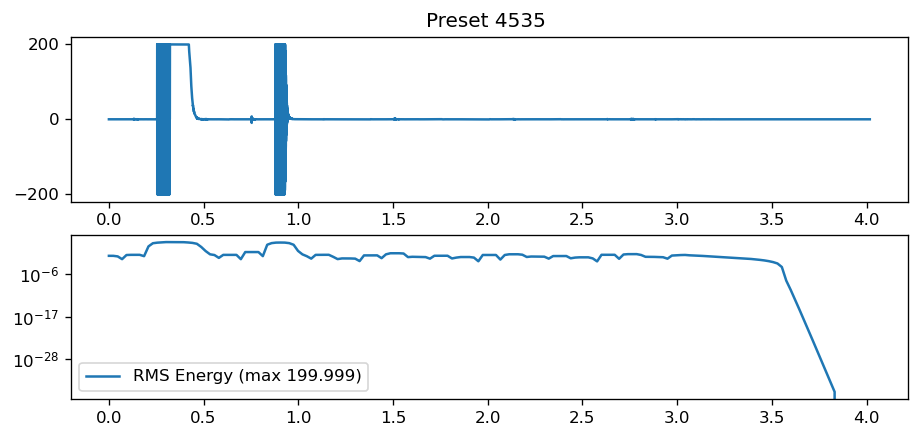

In [21]:
def render_and_plot_audio(preset_idx, load_pre_rendered_wav=False, dry = False):
    midi_note = 60
    midi_vel = 100
    
    if not load_pre_rendered_wav:
        # Nouvelle instance de DIVA à chaque nouveau rendu (pour éviter hanging notes...)
        diva_renderer = diva.Diva()
        preset = diva_db.get_preset_values(preset_idx, plugin_format=True)
        diva_renderer.assign_preset(preset)
        diva_renderer.set_default_general_filter_and_tune_params(dry = dry)
        audio = diva_renderer.render_note(midi_note, midi_vel, normalize=False)
        Fs = diva_renderer.Fs
        
    else:
        audio, Fs = diva_dataset.get_wav_file(preset_idx, midi_note, midi_vel)
    t = np.linspace(0.0, len(audio)/Fs, num=len(audio), endpoint=True)
    fig, axes = plt.subplots(2, 1, figsize=(9, 4))
    axes[0].plot(t, audio)
    axes[0].set_title("Preset {} ".format(preset_idx))
    rms = librosa.feature.rms(y=audio)
    times = librosa.times_like(rms)
    axes[1].semilogy(times, rms[0], label='RMS Energy (max {:.3f})'.format(rms[0].max()))
    axes[1].legend()
    
    return audio, Fs, rms[0].max()

audio, Fs, rms_max = render_and_plot_audio(4535, dry = False)
print(rms_max)
Audio(audio, rate=Fs)
#4535 son de merde 35


In [15]:
importlib.reload(diva)
importlib.reload(divadataset)

<module 'divadataset' from '/home/irisib/Bureau/nn-synth-interp/data/divadataset.py'>

0.48967261384550187


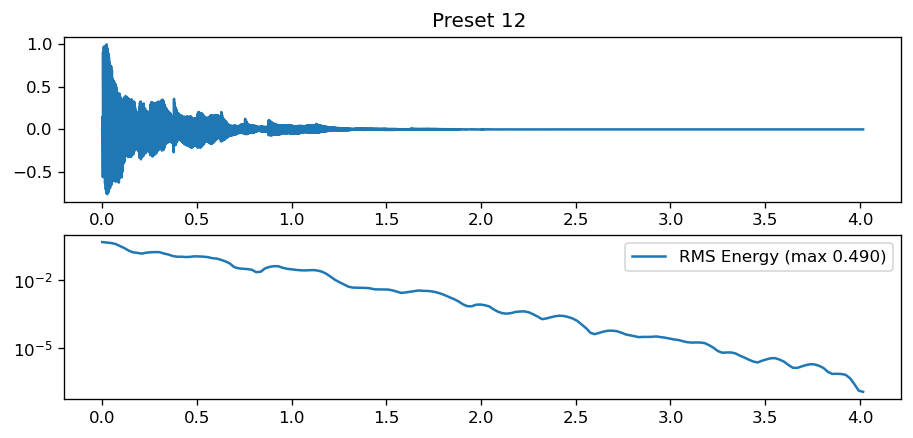

In [194]:
audio, Fs, rms_max = render_and_plot_audio(12, load_pre_rendered_wav=True, dry = False)
print(rms_max)
Audio(audio, rate=Fs)
#4535 son de merde 35

Calcul en cours... (0/11217)
Calcul en cours... (1000/11217)
Calcul en cours... (2000/11217)
Calcul en cours... (3000/11217)
Calcul en cours... (4000/11217)
Calcul en cours... (5000/11217)
Calcul en cours... (6000/11217)
Calcul en cours... (7000/11217)
Calcul en cours... (8000/11217)
Calcul en cours... (9000/11217)
Calcul en cours... (10000/11217)
Calcul en cours... (11000/11217)


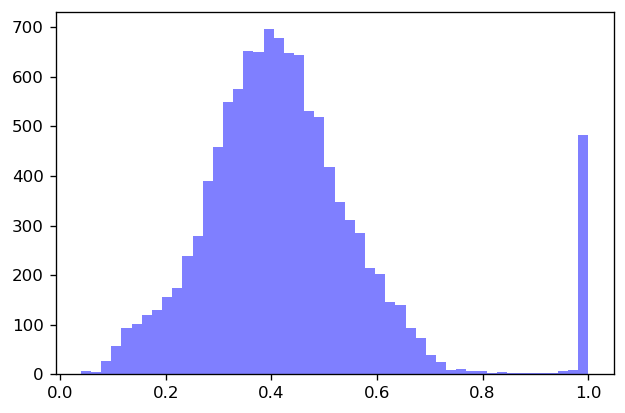

CPU times: user 14.9 s, sys: 2.14 s, total: 17 s
Wall time: 23.6 s


In [191]:
%%time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pickle

def Get_RMS(preset_idx, load_pre_rendered_wav=True):
    midi_note = 60
    midi_vel = 100
    
    if not load_pre_rendered_wav:
        # Nouvelle instance de DIVA à chaque nouveau rendu (pour éviter hanging notes...)
        diva_renderer = diva.Diva()
        preset = diva_db.get_preset_values(preset_idx, plugin_format=True)
        diva_renderer.assign_preset(preset)
        diva_renderer.set_default_general_filter_and_tune_params()
        audio = diva_renderer.render_note(midi_note, midi_vel, normalize=False)
        Fs = diva_renderer.Fs
        
    else:
        audio, Fs = diva_dataset.get_wav_file((preset_idx + 1), midi_note, midi_vel)
    
    rms = librosa.feature.rms(y=audio)
    
    return audio, Fs, rms[0].max()


histogram = []
histogram.clear()
for presets_idx in range (0, diva_db.get_nb_presets() - 1):
    _, _, MaxRMS = Get_RMS(presets_idx)
    histogram.append(MaxRMS)
    if presets_idx % 1000 == 0:
        print("Calcul en cours... (" + str(presets_idx) + "/" + str(diva_db.get_nb_presets()) + ")")

num_bins = 50
n, bins, patches = plt.hist(histogram, num_bins, facecolor='blue', alpha=0.5)
plt.show()
new_file = open("Max_RMS.pkl", "wb")
pickle.dump(histogram, new_file)

In [8]:
import pickle
open_file = pickle.load(open("Max_RMS.pkl", "rb"))

In [9]:
print(min(open_file))
print(max(open_file))

0.03915282415283056
1.0


4782


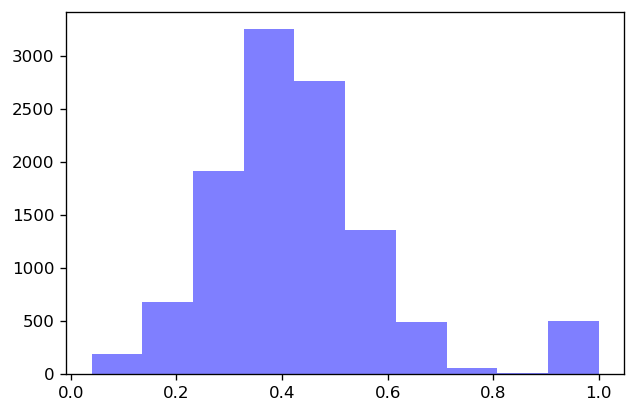

In [10]:
histogram = open_file
num_bins = 10
count = 0
n, bins, patches = plt.hist(histogram, num_bins, facecolor='blue', alpha=0.5)
for el in histogram:
    if 0.4 < el < 0.6:
        count = count + 1
print(count)

515
[78, 90, 105, 119, 125, 140, 157, 181, 182, 187, 209, 233, 239, 244, 289, 304, 312, 384, 404, 429, 437, 463, 470, 476, 500, 544, 570, 572, 663, 683, 692, 704, 708, 719, 723, 724, 780, 793, 804, 818, 862, 871, 886, 894, 897, 910, 911, 921, 1018, 1066, 1103, 1130, 1236, 1273, 1287, 1323, 1340, 1350, 1378, 1440, 1455, 1477, 1511, 1610, 1628, 1649, 1712, 1748, 1757, 1769, 1791, 1802, 1857, 1907, 1919, 1923, 1926, 1930, 1968, 1969, 1975, 1998, 2002, 2045, 2090, 2213, 2215, 2219, 2225, 2234, 2254, 2321, 2363, 2404, 2438, 2464, 2502, 2549, 2567, 2569, 2602, 2605, 2606, 2622, 2624, 2643, 2719, 2753, 2763, 2785, 2822, 2823, 2825, 2830, 2848, 2866, 2886, 2887, 2912, 2916, 2919, 2925, 2967, 2992, 3019, 3023, 3087, 3095, 3123, 3167, 3175, 3181, 3187, 3218, 3233, 3269, 3272, 3273, 3281, 3287, 3291, 3294, 3328, 3346, 3374, 3381, 3387, 3403, 3408, 3415, 3424, 3448, 3471, 3496, 3522, 3546, 3550, 3552, 3574, 3621, 3666, 3684, 3694, 3710, 3716, 3745, 3749, 3771, 3821, 3825, 3830, 3857, 3868, 3890, 3

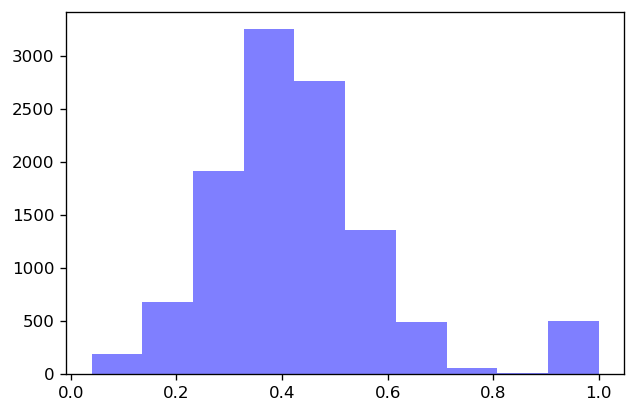

In [211]:
num_bins  = 10
count     = 0
idx       = 1
index_rms = []
index_rms.clear()

n, bins, patches = plt.hist(histogram, num_bins, facecolor='blue', alpha=0.5)
for el in histogram:
    if 0.8 < el < 1.1:
        index_rms.append(idx)
        count = count + 1
    idx = idx + 1
print(count)
print(index_rms)

In [7]:
num_bins  = 10
count     = 0
idx       = 1
index_rms = []
index_rms.clear()

n, bins, patches = plt.hist(histogram, num_bins, facecolor='blue', alpha=0.5)
for el in histogram:
    if 0.7 < el < 0.8:
        index_rms.append(idx)
        count = count + 1
    idx = idx + 1
print(count)
print(index_rms)

NameError: name 'histogram' is not defined

# MULTI-PROCESSING

In [209]:
import os

NUM_PROC  = 5
children = []

for process in range(NUM_PROC):
    pid = os.fork()
    if pid > 0:
        print("This is the parent process {}".format(os.getpid()))
        children.append(pid)
    else:
        print("This is the child process {}".format(os.getpid()))
        os._exit(0)

for i, proc in enumerate(children):
    os.waitpid(proc, 0)

print("Parent process is closing")

This is the child process 1725443This is the parent process 767013
This is the child process 1725446
This is the parent process 767013
This is the parent process 767013
This is the parent process 767013This is the child process 1725456This is the parent process 767013
This is the parent process 767013
This is the child process 1725451

This is the parent process 767013
This is the parent process 767013
This is the parent process 767013
This is the parent process 767013
This is the child process 1725459

This is the parent process 767013
This is the parent process 767013
This is the parent process 767013
This is the parent process 767013
This is the parent process 767013
Parent process is closing


In [59]:
%%time
from multiprocessing import Process
import multiprocessing
from datetime import datetime

def f(name, debut, fin):
    for el in range (debut, fin):
        if el == (fin - 1):
            print(fin)
    print('hello', name)
    print(datetime.now())

if __name__ == '__main__':
    print(datetime.now())
    print(multiprocessing.cpu_count())
    testProcess = []
    for i in range (0, 4):
        print (i)
    p = Process(target=f, args=('process 1',  0, 40000000))
    p1 = Process(target=f, args=('process 2', 0, 30000000))
    p2 = Process(target=f, args=('process 3', 0, 10000000))
    p3 = Process(target=f, args=('process 4', 0, 20000000))
    testProcess.append(p)
    testProcess.append(p1)
    testProcess.append(p2)
    testProcess.append(p3)
    for process in testProcess:
        print(process)
        process.start()
        #process.join()

2021-03-08 11:00:58.033150
4
0
1
2
3
<Process name='Process-110' parent=2797 initial>
<Process name='Process-111' parent=2797 initial>
<Process name='Process-112' parent=2797 initial>
<Process name='Process-113' parent=2797 initial>
CPU times: user 9.74 ms, sys: 32.5 ms, total: 42.2 ms
Wall time: 43.4 ms
10000000
hello process 3
2021-03-08 11:00:58.749903
20000000
hello process 4
2021-03-08 11:00:59.430853
30000000
hello process 2

2021-03-08 11:00:59.92866340000000
hello process 1
2021-03-08 11:01:00.521251


In [74]:
%%time
f('process 1', 0, 100000000)
f('process 1', 0, 200000000)
f('process 1', 0, 300000000)
f('process 1', 0, 400000000)

NameError: name 'f' is not defined

In [24]:
%%time
#multiprocessing.set_start_method('fork')
import os

multiprocessing.set_start_method('fork')
num_processor = multiprocessing.cpu_count()
process_list = []
process_list.clear()
print(datetime.now())
print(num_processor)

for i in range (0, num_processor):
    print(i)
    process_list.append(Process(target=diva_dataset.generate_wav_files_multi_process,
                                args=(int(len(diva_dataset)/num_processor * i),
                                      int(len(diva_dataset)/num_processor * (i + 1)),
                                      "Process n°" + str(i))))
    
for process in process_list:
    if not process.is_alive():
        process.start()
        print(process.pid)
    #else:
        #process.join()
    #process.join()
print(datetime.now())

2021-03-08 14:28:13.464314
4
0
1
2
3
953322
953339
953356
953373
2021-03-08 14:28:13.560061
CPU times: user 9.31 ms, sys: 44.9 ms, total: 54.2 ms
Wall time: 95.9 ms


Process n°2
5608
Process n°2 : Writing .wav files... (0/2804)




Process n°1Process n°0
0

2804Process n°0 : Writing .wav files... (0/2804)

Process n°1 : Writing .wav files... (0/2804)


Process n°3
8412
Process n°3 : Writing .wav files... (0/2804)


Process n°2
5609


Process n°3
8413


Process n°0
1


Process n°1

2805

Process n°3
8414


Process n°0
2


Process n°1
2806


Process n°3


8415Process n°0

3


Process n°2

5610

Process n°1
2807


Process n°3

8416

Process n°0
4


Process n°2
5611


Process n°1
2808


Process n°0
5


Process n°3
8417


Process n°2
5612


Process n°1
2809


Process n°3

8418

Process n°0
6


Process n°1
2810

Process n°2

5613


Process n°3
8419


Process n°0
7


Process n°2
5614


Process n°0
8


Process n°3
8420




Process n°1Process n°0

92811



Process n°2
5615


Process n°3
8421



In [3]:
num_processor = multiprocessing.cpu_count()
for i in range (0, num_processor):
    print("BEGIN : " + str(i))
    print(int(len(diva_dataset)/num_processor * i))
    print("END   : " + str(i))
    print(int(len(diva_dataset)/num_processor * (i + 1)))

BEGIN : 0
0
END   : 0
2804
BEGIN : 1
2804
END   : 1
5608
BEGIN : 2
5608
END   : 2
8412
BEGIN : 3
8412
END   : 3
11216


In [19]:
process1 = Process(target=diva_dataset.generate_wav_files_multi_process,
                                args=(int(len(diva_dataset)/num_processor * i),
                                      int(len(diva_dataset)/num_processor * (i + 1)),
                                      "Process n°" + str(i)))
process1.start()
print('process id:' + str(process1.pid)

SyntaxError: unexpected EOF while parsing (<ipython-input-19-d10ccfa0c8bd>, line 6)

In [88]:
strange = list(range(11, 17))
print(strange)

[11, 12, 13, 14, 15, 16]


In [25]:
raw_full_preset = diva_db.all_presets

In [27]:
print(diva_db.all_presets[1])

[(0, 0.11), (1, 1.0), (2, 1.0), (3, 0.0), (4, 0.0), (5, 0.4), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.5), (10, 1.0), (11, 0.07692307692307693), (12, 0.07692307692307693), (13, 0), (14, 0.5), (15, 0.5), (16, 0.0), (17, 0), (18, 0.6666666666666666), (19, 0.0), (20, 0.35), (21, 0.1), (22, 0.1), (23, 0.01), (24, 0.1), (25, 0.5), (26, 0.5), (27, 0.5), (28, 0.5), (29, 0.5), (30, 0.5), (31, 0.5), (32, 0.5), (33, 0.0), (34, 0.34), (35, 0.19), (36, 0.44), (37, 0.0), (38, 0.5), (39, 0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.28), (46, 0.39), (47, 0.52), (48, 1.0), (49, 1.0), (50, 0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.038461538461538464), (56, 0.3333333333333333), (57, 0.14285714285714285), (58, 0.0), (59, 0.0), (60, 0.043478260869565216), (61, 1.0), (62, 0.7), (63, 0.0), (64, 0.5), (65, 0.2692307692307692), (66, 0.0), (67, 0.14285714285714285), (68, 0.23), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.5), (73, 0.0), (74, 0.5), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0

In [29]:
test1 = [0,1,2,3,4,5]
test2 = test1
test1.append(6)
test3 = []
test3.append(test1)
test3.append(test2)
print(test3)

[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6]]


In [9]:
listCard = []
for el in range (0,281):
    card = diva_synth.get_param_cardinality(el)
    if card > 0:
        listCard.append(el)
print(listCard)
print(diva_synth.get_param_cardinality(280))

[1, 2, 4, 5, 6, 7, 11, 12, 13, 14, 16, 17, 18, 19, 38, 39, 40, 41, 42, 49, 50, 51, 52, 53, 55, 56, 57, 60, 63, 65, 66, 67, 70, 73, 77, 78, 79, 80, 81, 82, 83, 84, 85, 95, 100, 101, 102, 103, 105, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 133, 135, 137, 139, 142, 144, 146, 147, 150, 152, 156, 157, 158, 159, 161, 163, 165, 169, 170, 172, 174, 178, 179, 183, 187, 207, 216, 217, 218, 222, 226, 246, 255, 257, 259, 260, 261, 262, 263, 268, 270, 271, 272, 273, 278, 279, 280]
2


In [10]:
l = [5,2]
for el in l:
    el = 0
print (l)

[5, 2]
